In [51]:
import pandas as pd

#чтение фаила Средние потребительские цены по Российской Федерации в 1991-2023 гг.
#https://rosstat.gov.ru/statistics/price
df1 = pd.read_csv("tab1.csv", encoding='Shift-JIS', sep=';')

#поиск строк где есть значения не проставленые за год( -16 строк )
matches = df1[df1.apply(lambda row: row.astype(str).str.contains('ﾉ').any(), axis=1)]

# Удаление строк из df1, которые есть в matches
df1 = df1.drop(matches.index)

# Сброс индексов после удаления строк (необязательно)
df1 = df1.reset_index(drop=True)

#приведение в удобный для работы с числами формат
df1 = df1.apply(lambda x: x.str.replace(',', '.')).astype(float)

df1

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,15.54,221.50,2201.27,5186.28,12547.0,14137.0,15787.0,30.04,42.01,52.72,...,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17,519.83
1,14.38,260.00,2672.81,6579.38,15053.0,16810.0,19055.0,33.99,43.37,58.45,...,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92,344.82
2,13.57,194.76,2238.98,5677.09,11587.0,13815.0,16061.0,30.74,39.28,48.80,...,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22,227.58
3,17.00,271.00,3351.30,8984.10,20016.0,22859.0,26767.0,43.81,61.56,77.97,...,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16,513.77
4,8.87,163.90,1165.48,2991.46,6692.0,7375.0,7811.0,15.50,18.16,19.52,...,94.42,117.04,121.37,125.21,130.13,139.47,153.50,167.04,580.06,603.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.59,17.34,249.00,955.52,2638.0,3805.0,4581.0,5.12,7.90,9.19,...,76.55,85.19,93.12,97.94,101.56,105.12,104.88,111.85,132.51,136.25
66,30.17,618.53,10304.00,35615.39,90428.0,134568.0,168016.0,201.84,264.25,351.35,...,2205.20,2521.46,2689.09,2782.90,2890.99,3118.21,3018.63,3155.47,3729.98,3966.38
67,19.64,360.03,6664.00,25380.81,60847.0,83494.0,118718.0,135.41,197.90,279.76,...,1614.10,1789.74,1838.78,1869.65,1869.54,1937.53,2000.21,1960.71,2375.25,2515.01
68,10.50,122.61,1614.00,7016.21,20704.0,29400.0,35055.0,41.90,52.67,62.97,...,555.94,610.84,668.09,683.90,724.61,780.86,810.75,889.91,1028.49,1111.04


In [52]:
#получение средних за год значений
mean1 = df1.mean(axis=0, numeric_only=True)
mean1

1991        97.490286
1992      2346.919857
1993     15557.409857
1994     40332.678714
1995     90661.885714
1996    111624.128571
1997    124432.928571
1998       227.308429
1999       298.581714
2000       358.475286
2001       424.111714
2002       472.574000
2003       491.625571
2004       525.612429
2005       570.927571
2006       630.982714
2007       712.175000
2008       801.497714
2009       905.808714
2010       964.688571
2011      1062.450714
2012      1142.998429
2013      1211.467000
2014      1370.189571
2015      1574.248571
2016      1647.715143
2017      1695.610714
2018      1742.444286
2019      1792.941286
2020      1913.074857
2021      2142.789286
2022      2348.006286
2023      2499.471000
dtype: float64

In [62]:
"""
работа с данными из фаила Среднемесячная номинальная начисленная заработная плата работников по полному кругу организаций в целом по экономике Российской Федерации в 1991-2024гг.
"""
#https://rosstat.gov.ru/labor_market_employment_salaries
income = [
    548, 6000, 58700, 220400, 472400, 790200, 950200, 1051.0, 1523.0, 2223.0,
    3240.0, 4360.0, 5499.0, 6740.0, 8555.0, 10634.0, 13593.0, 17290.0,
    18638.0, 20952.0, 23369.0, 26629.0, 29792.0, 32495.0, 34030.0, 36709.0,
    39167.0, 43724.0, 47867.0, 51344.0, 57244.0, 65338.0, 74854.0
]#рублей в месяц

In [60]:
#доработка списка итоговых данных
years = list(mean1.index)
prices = list(mean1)#руб за кг или литр

In [61]:
#проверка правильной компановки значений
if len(years)==len(prices)==len(income):
    print("количество значений на каждый год совпадает")

количество значений на каждый год совпадает


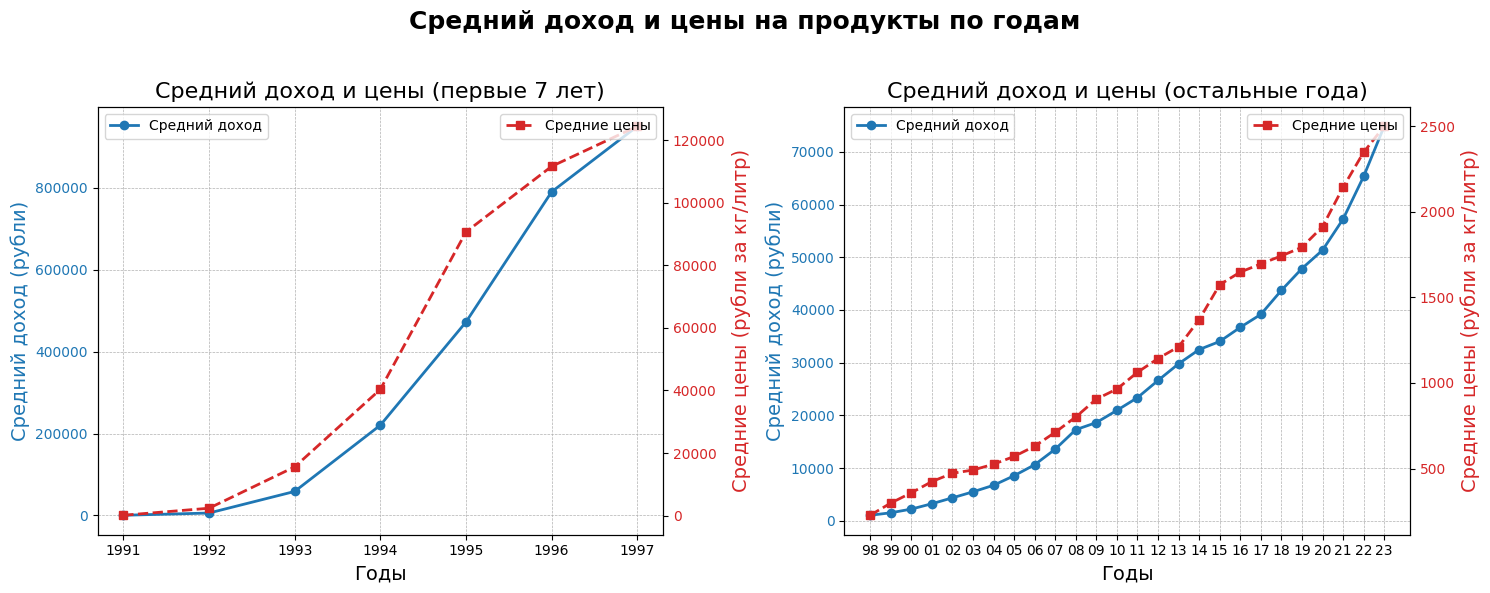

In [67]:
#формирование графика
import matplotlib.pyplot as plt
# Делим данные на две части
years_1, income_1, prices_1 = years[:7], income[:7], prices[:7]
years_2, income_2, prices_2 = years[7:], income[7:], prices[7:]
years_2 = [str(i)[2:] for i in years_2]

# Создаем график для первых 7 значений
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Первый график
ax1.plot(years_1, income_1, color="tab:blue", marker="o", linestyle="-", linewidth=2, markersize=6, label="Средний доход")
ax1.set_xlabel("Годы", fontsize=14)
ax1.set_ylabel("Средний доход (рубли)", color="tab:blue", fontsize=14)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

ax1_twin = ax1.twinx()
ax1_twin.plot(years_1, prices_1, color="tab:red", marker="s", linestyle="--", linewidth=2, markersize=6, label="Средние цены")
ax1_twin.set_ylabel("Средние цены (рубли за кг/литр)", color="tab:red", fontsize=14)
ax1_twin.tick_params(axis="y", labelcolor="tab:red")

ax1.set_title("Средний доход и цены (первые 7 лет)", fontsize=16)
ax1.legend(loc="upper left")
ax1_twin.legend(loc="upper right")

# Второй график
ax2.plot(years_2, income_2, color="tab:blue", marker="o", linestyle="-", linewidth=2, markersize=6, label="Средний доход")
ax2.set_xlabel("Годы", fontsize=14)
ax2.set_ylabel("Средний доход (рубли)", color="tab:blue", fontsize=14)
ax2.tick_params(axis="y", labelcolor="tab:blue")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

ax2_twin = ax2.twinx()
ax2_twin.plot(years_2, prices_2, color="tab:red", marker="s", linestyle="--", linewidth=2, markersize=6, label="Средние цены")
ax2_twin.set_ylabel("Средние цены (рубли за кг/литр)", color="tab:red", fontsize=14)
ax2_twin.tick_params(axis="y", labelcolor="tab:red")

ax2.set_title("Средний доход и цены (остальные года)", fontsize=16)
ax2.legend(loc="upper left")
ax2_twin.legend(loc="upper right")

# Общий заголовок и отображение графиков
fig.suptitle("Средний доход и цены на продукты по годам", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()